<a href="https://colab.research.google.com/github/pradeepvaranasi/insurance_re/blob/main/Insurance_CaseStudy_PradeepVaranasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Objective


**Goal:** Increase Profitability by targeting Customer Retention.

**Objective:** The objective is to provide an analytics-driven approach for a consumer bank to cross-sell insurance products, specifically the Personal Protection Insurance (PPI) product, to its consumer base. The focus is on identifying the customers who currently do not have a PPI and determining the appropriate type of PPI product to target them with.

**Assumptions:**

The provided dataset contains various fields related to product ownership, credit standing, outstanding amounts, and insurance information. We can assume that the data fields may belong to a country with a consumer banking system and insurance products similar to those commonly found in United Kingdom.

For instance, CIFAS *(one of the columns used in the dataset)* is a fraud prevention service in the United Kingdom

ref: https://en.wikipedia.org/wiki/Cifas



### Exploratory Data Analysis

1. Data Exploration and Cleansing
2. Missing Values
3. Outliers
4. Uni-variate
5. Bi-variate
6. Multi-variate
7. Hypothesis Testing
8. Feature Engineering



####Importing Libraries

In [533]:
# Imporing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

####Importing Data

In [534]:
# Establishing the connection between Colab and Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [535]:
# Importing the data from gdrive
data = pd.read_excel('drive/MyDrive/Mortgage_Insurance_Data.xls')

In [536]:
# Displaying all the columns
pd.set_option('display.max_columns', None)

In [537]:
# Checking the output for first n rows
data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [538]:
# Creating a copy of the original dataframe
df = data.copy()

####Attributes Exploration

In [539]:
# Checking the shape of df
df.shape

(16383, 59)

In [540]:
df[df.duplicated() == True].shape

(0, 59)

In [541]:
# Checking the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

In [542]:
df['PPI'].value_counts()

1    9461
0    6922
Name: PPI, dtype: int64

In [543]:
# Checking for missing values
df.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [544]:
# Checking the statistical summary for df - numerical columns
df.describe(include=('int', 'float'))

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,1.638300e+04,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,9405.000000,16383.000000,16383.000000,16383.000000
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.808460,103.096075,4.408716,194.491119,1.663663e+05,7.006096e+04,7.821424e+04,601.941952,2.692608,44.100531,64.961607,0.205579,5.011231,90.182262,18.579747,0.798633,0.482757,0.326497,2.917659,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
std,12142.797527,93.149605,26.689123,6673.343595,9.662504,16.718957,5.130278,109.192185,1.118947,91.541972,1.668857,107.144729,1.187209e+05,8.302773e+04,8.942350e+04,614.070641,2.381330,10.886422,82.041497,0.629787,42.609551,23.645068,63.096233,1.296641,1.138039,1.254672,2.398112,7.449055,0.540908,145.935978,2.669217,22.092297,0.493974,24.283753,0.485976,0.263032,0.325402
min,1.000000,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,517.000000,0.000000,0.000000,0.000000
25%,10699.000000,818.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,38.000000,0.000000,38.000000,3.000000,120.000000,1.200000e+05,0.000000e+00,9.255500e+03,112.500000,0.000000,36.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,34.000000,4.000000,99.000000,0.000000,716.000000,0.000000,0.000000,0.000000
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.000000,72.000000,5.000000,181.000000,1.250000e+05,6.000000e+04,5.943000e+04,496.000000,4.000000,44.000000,48.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000
75%,31689.000000,947.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,180.000000,1.000000,144.000000,6.000000,252.000000,1.900000e+05,1.076985e+05,1.186560e+05,893.000000,5.000000,51.000000,104.000000,0.000000,0.000000,99.000000,8.000000,1.000000,0.000000,0.000000,4.000000,10.000000,0.000000,194.000000,9.000000,99.000000,1.000000,759.000000,1.000000,0.000000,0.000000
max,42072.000000,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,6.000000,756.000000,3.300000e+06,3.505442e+06,1.876225e+06,8942.000000,6.000000,77.000000,999.000000,9.000000,999.000000,99.000000,999.000000,6.000000,6.000000,9.000000,9.000000,34.000000,9.000000,999.000000,9.000000,99.000000,1.000000,779.000000,1.000000,1.000000,1.000000


In [545]:
# statistical summary - object datatytppe
df.describe(include ='object')

,Final_Grade,Loan_Type,Residential_Status,Telephone_Indicator,Marital_Status,Gender,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Payment_Method,Bankruptcy_Detected__SP_,CIFAS_detected,Insurance_Description,prdt_desc,category
count,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,9461,9345,9461
unique,10,2,4,2,4,2,9,2,2,2,2,2,2,2,2,2,3,3,3,24,15,4
top,A,UnSecured,H,Y,M,M,P,F,P,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,D,N,N,LASU,LASU,Single
freq,4538,13054,12572,15241,9432,9770,10118,16308,16361,16351,13028,12087,16227,16198,14659,12976,16308,16351,16292,2351,3889,6264


In [546]:
# Checking the statistical summary on df (especially mean vs. median to check the effect of outliers)
df.describe(include=('int', 'float')).iloc[[1,5]]

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.80846,103.096075,4.408716,194.491119,166366.301288,70060.964842,78214.242446,601.941952,2.692608,44.100531,64.961607,0.205579,5.011231,90.182262,18.579747,0.798633,0.482757,0.326497,2.917659,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.00000,72.000000,5.000000,181.000000,125000.000000,60000.000000,59430.000000,496.000000,4.000000,44.000000,48.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000


#####Insights

1. **Total rows and columns**: 16383 rows and 59 columns
2. **Duplicates**: No duplicate values found in the dataframe
3. **Datatypes**: numerical (int, float) - 37 ; Object (categorical): 22
4. **Missing Values**: Insurance_Description, code, prdt_desc, category have missing values. It is ideally because PPI==0 for these customers but the further exploration will be performed on additional missing values for the customers where PPI==1
5. **Possible Outliers**: Net_Advance, Time_in_Employment, Time_at_Address, Value_of_Property, Outstanding_Mortgage_Bal,	Total_Outstanding_Balances,	Bureau_Data___Monthly_Other_Co_R, Total_outstanding_balance__mortg columns majorly have the presence of outliers

####Data Visualization

In [547]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

#####uni-variate

In [548]:
df['PPI'].value_counts()

1    9461
0    6922
Name: PPI, dtype: int64

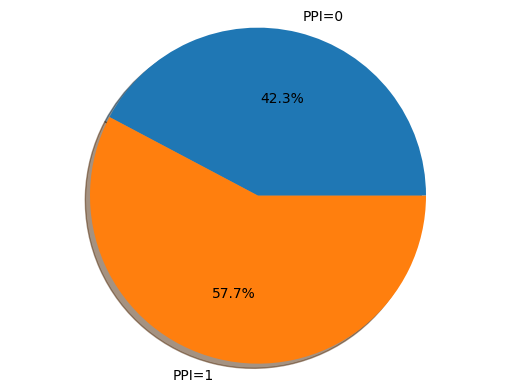

In [549]:
# PieChart for the column - PPI
labels = ['PPI=0', 'PPI=1']
sizes = [df['PPI'].value_counts()[0],
         df['PPI'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


~58% customers already have a personal protection insurance and the data is almost balanced

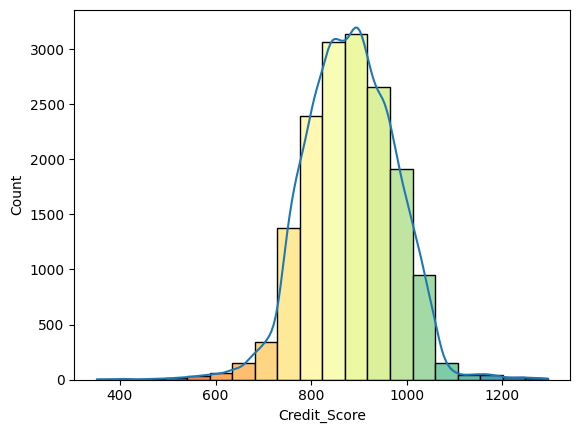

In [550]:
# Histplot for the column - 'Credit_Score'

cm = sns.color_palette("Spectral",20)
plot = sns.histplot(df['Credit_Score'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

The credit score almost forms a normal distribution with a slight left-skewness, where majority of the customers fall under a score of 850-900

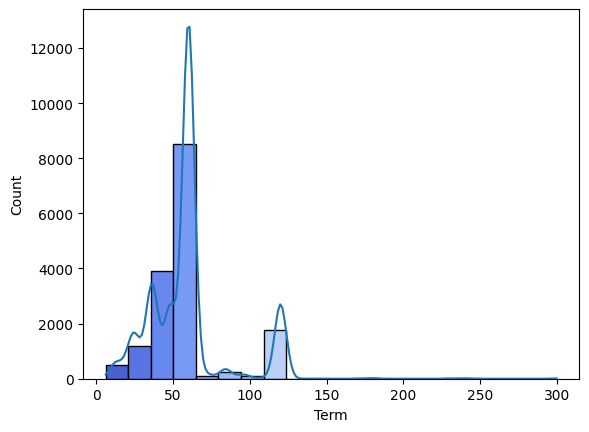

In [551]:
# Histplot for the column - 'Term'

cm = sns.color_palette("coolwarm",20)
plot = sns.histplot(df['Term'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

Atleast 75% of the total customers opted for a loan term of 40-60 months or 3.5-5 years. 10 years loan term is the second popular term among 12.5% of the customers.

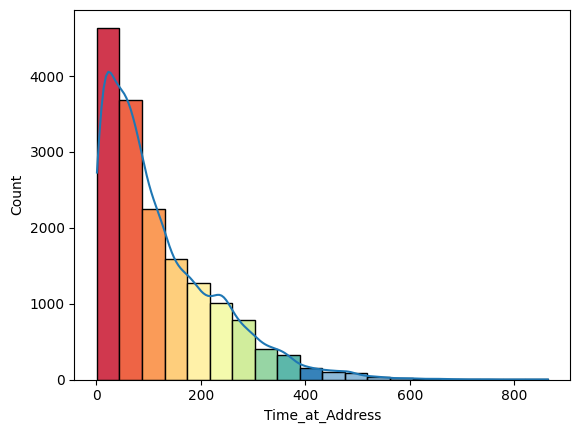

In [552]:
# Histplot for the column - 'Time_at_Address'

cm = sns.color_palette("Spectral",10)
plot = sns.histplot(df['Time_at_Address'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

Only 20% or less number of total customers stayed at their address for more than 15 years, suggesting the consumers newly moved to the addresses provided or they move places frequently.

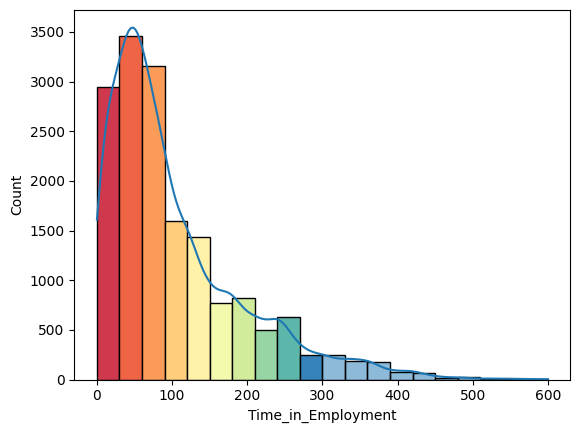

In [553]:
# Histplot for the column - 'Time_in_Employment'

cm = sns.color_palette("Spectral",10)
plot = sns.histplot(df['Time_in_Employment'], bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

More than 60% of the customers have less than ~8 years of employment which suggests that the sample is skewed towards younger consumers.

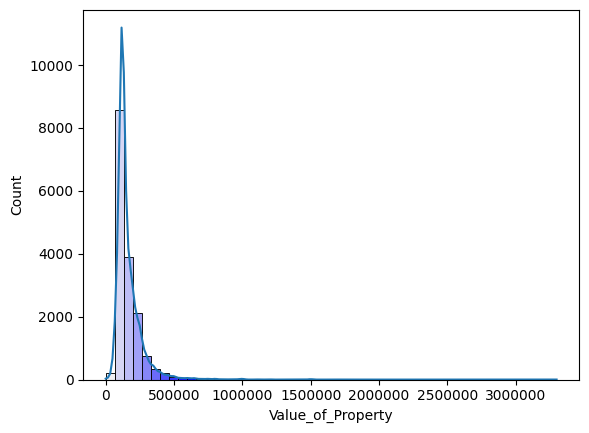

In [554]:
# Histplot for the column - 'Value_of_Property'

cm = sns.color_palette("light:b",10)
plot = sns.histplot(df['Value_of_Property'], bins=50, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.ticklabel_format(style='plain')
plt.show()

More than 75% of the customers have their property value under 250,000 which indicates the sample is targeting towards working-class

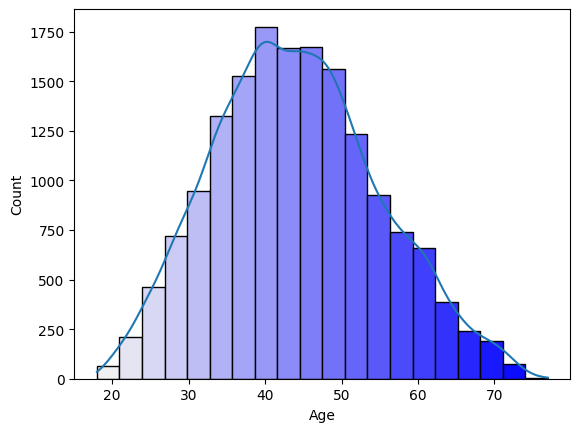

In [555]:
# Histplot for the column - 'Age'

cm = sns.color_palette("light:b",20)
plot = sns.histplot(abs(df['Age']), bins=20, kde=True)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.show()

In [556]:
print("Age-Median: ", df['Age'].median())
print("Age-Mean: ", df['Age'].mean())

Age-Median:  44.0
Age-Mean:  44.10053103827138


For the given sample, Age is very normally distributed, where the avg is about 44.

[Text(0, 0, '4538 (28%)'),
 Text(0, 0, '4076 (25%)'),
 Text(0, 0, '2241 (14%)'),
 Text(0, 0, '1538 (9%)'),
 Text(0, 0, '1367 (8%)'),
 Text(0, 0, '1093 (7%)'),
 Text(0, 0, '733 (4%)'),
 Text(0, 0, '341 (2%)'),
 Text(0, 0, '328 (2%)'),
 Text(0, 0, '128 (1%)')]

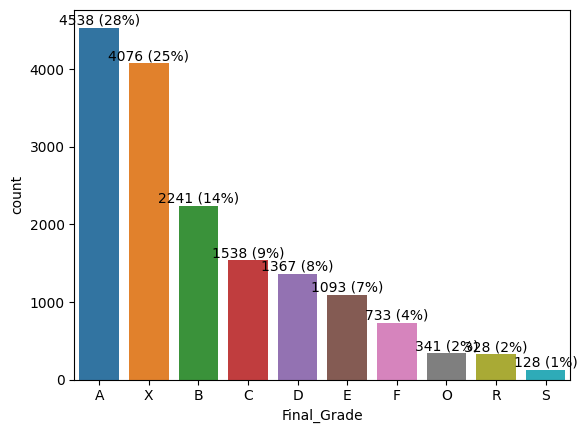

In [557]:
# Countplot for the column - Final_Grade
ax = sns.countplot(x=df['Final_Grade'],
order=df['Final_Grade'].value_counts(ascending=False).index);

abs_values = df['Final_Grade'].value_counts(ascending=False)
rel_values = df['Final_Grade'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

Assumptions:
1. Final_Grade could be an evaluation of a customer's credit application and 'X' could be missing/unknown or not generated.
2. O/R/S could be special cases/categories
3. A indicates excellent grade and F indices poor grade.

Based on the above assumptions, the sample includes majority of the customers falling into good-decent final_grade bucket.

In [558]:
df['Loan_Type'].value_counts()

UnSecured    13054
secured       3329
Name: Loan_Type, dtype: int64

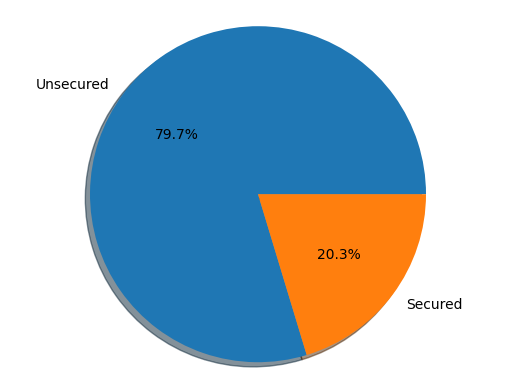

In [559]:
# PieChart for the column - Loan_Type
labels = ['Unsecured', 'Secured']
sizes = [df['Loan_Type'].value_counts()[0],
         df['Loan_Type'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


~80% of the total loans are unsecured, suggesting that the sample base has Credit cards, Personal, Student types of loans.

[Text(0, 0, '12572 (77%)'),
 Text(0, 0, '2885 (18%)'),
 Text(0, 0, '750 (5%)'),
 Text(0, 0, '176 (1%)')]

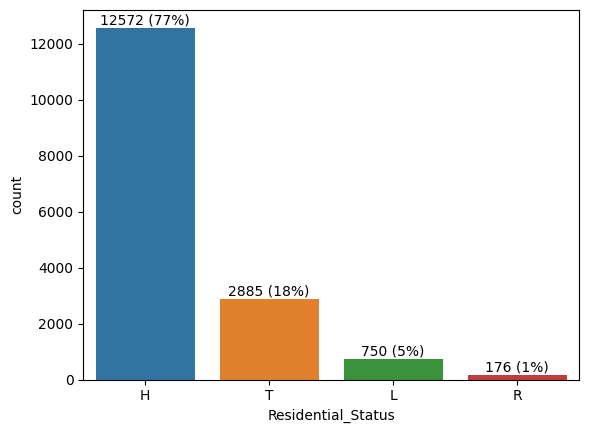

In [560]:
# Countplot for the column - Residential_Status
ax = sns.countplot(x=df['Residential_Status'],
order=df['Residential_Status'].value_counts(ascending=False).index);

abs_values = df['Residential_Status'].value_counts(ascending=False)
rel_values = df['Residential_Status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

Assumption: H: Homeowner; T: Tenant; L: Living with family; R: missing/unknown

77% of the total customers have thier own property

[Text(0, 0, '9082 (55%)'),
 Text(0, 0, '3363 (21%)'),
 Text(0, 0, '2476 (15%)'),
 Text(0, 0, '1059 (6%)'),
 Text(0, 0, '311 (2%)'),
 Text(0, 0, '70 (0%)'),
 Text(0, 0, '18 (0%)'),
 Text(0, 0, '3 (0%)'),
 Text(0, 0, '1 (0%)')]

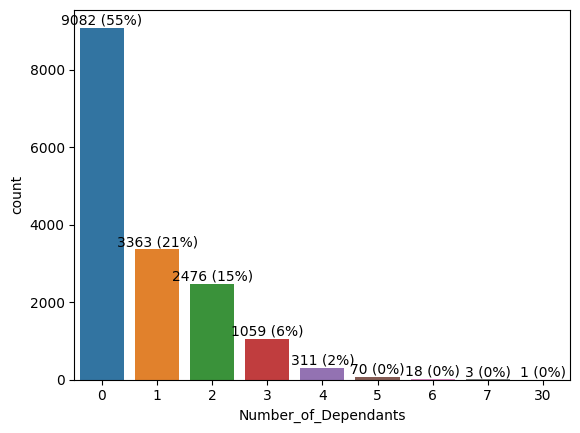

In [561]:
# Countplot for the column - Number_of_Dependants
ax = sns.countplot(x=df['Number_of_Dependants'],
order=df['Number_of_Dependants'].value_counts(ascending=False).index);

abs_values = df['Number_of_Dependants'].value_counts(ascending=False)
rel_values = df['Number_of_Dependants'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

Majority of the customers have either 2 or less/no dependents.

[Text(0, 0, '9432 (58%)'),
 Text(0, 0, '5037 (31%)'),
 Text(0, 0, '1598 (10%)'),
 Text(0, 0, '316 (2%)')]

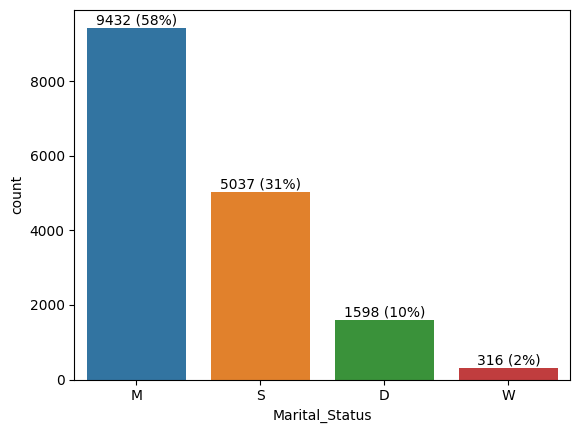

In [562]:
# Countplot for the column - Marital_Status
ax = sns.countplot(x=df['Marital_Status'],
order=df['Marital_Status'].value_counts(ascending=False).index);

abs_values = df['Marital_Status'].value_counts(ascending=False)
rel_values = df['Marital_Status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

The sample provided includes 58% of married customers followed by 31% single.

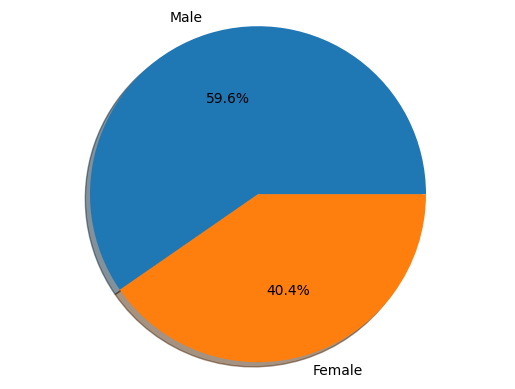

In [563]:
# PieChart for the column - Gender
labels = ['Male', 'Female']
sizes = [df['Gender'].value_counts()[0],
         df['Gender'].value_counts()[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


The customer base sample is inclined towards male and married users.






[Text(0, 0, '16308 (100%)'), Text(0, 0, '58 (0%)'), Text(0, 0, '17 (0%)')]

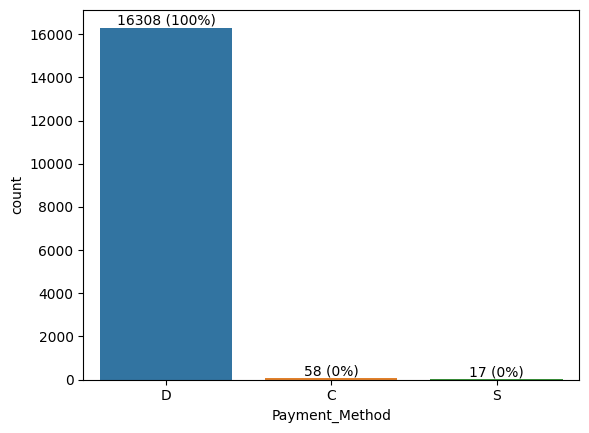

In [564]:
# Countplot for the column - Payment_Method
ax = sns.countplot(x=df['Payment_Method'],
order=df['Payment_Method'].value_counts(ascending=False).index);

abs_values = df['Payment_Method'].value_counts(ascending=False)
rel_values = df['Payment_Method'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

Close to 100% of the customers prefer the Direct Debit method to deduct payments towards the bank/financial institution.

[Text(0, 0, '16351 (100%)'), Text(0, 0, '24 (0%)'), Text(0, 0, '8 (0%)')]

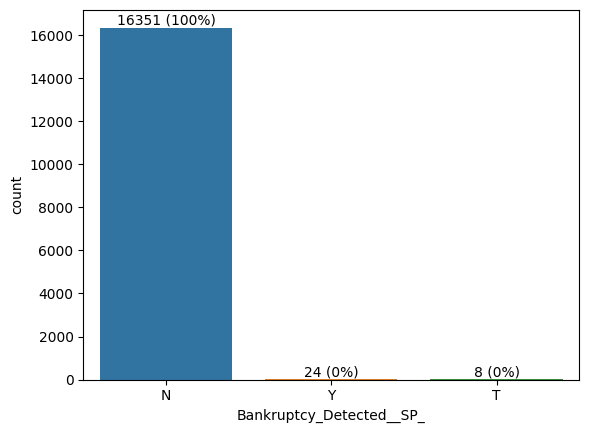

In [565]:
# Countplot for the column - Bankruptcy_Detected__SP_
ax = sns.countplot(x=df['Bankruptcy_Detected__SP_'],
order=df['Bankruptcy_Detected__SP_'].value_counts(ascending=False).index);

abs_values = df['Bankruptcy_Detected__SP_'].value_counts(ascending=False)
rel_values = df['Bankruptcy_Detected__SP_'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

Bankruptcy has been detected for 0.15% of the total customer base.

[Text(0, 0, '16292 (99%)'), Text(0, 0, '83 (1%)'), Text(0, 0, '8 (0%)')]

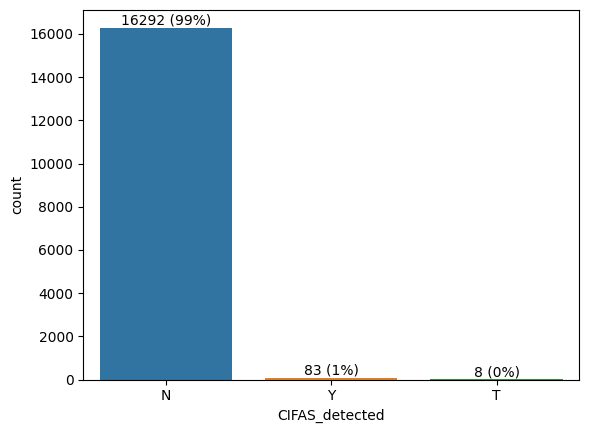

In [566]:
# Countplot for the column - CIFAS_detected
ax = sns.countplot(x=df['CIFAS_detected'],
order=df['CIFAS_detected'].value_counts(ascending=False).index);

abs_values = df['CIFAS_detected'].value_counts(ascending=False)
rel_values = df['CIFAS_detected'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

CIFAS indicated, the fraud is detected on the 1% of the sample customer base.

#####bi-variate

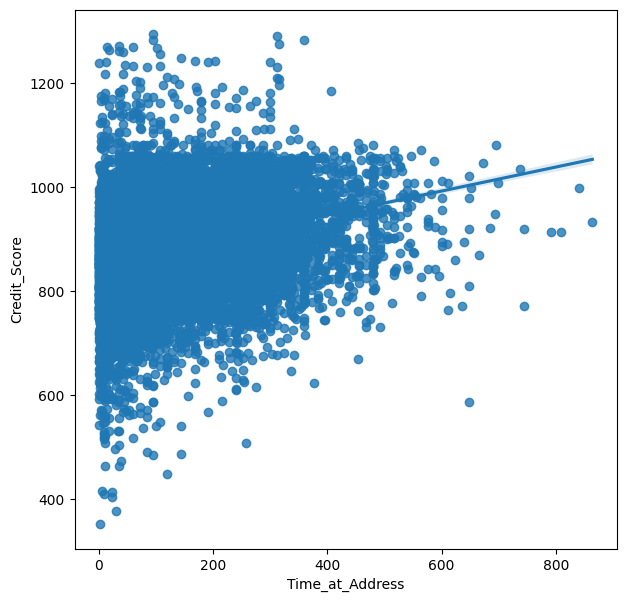

In [567]:
# Time at Address vs. Credit Score
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

# Plot the relationship between two variables
plt.figure(figsize=(7,7))
sns.regplot(x=df['Time_at_Address'], y=df['Credit_Score'])
plt.show()

There is a little effect of Time_at_address on the Credit_Score.

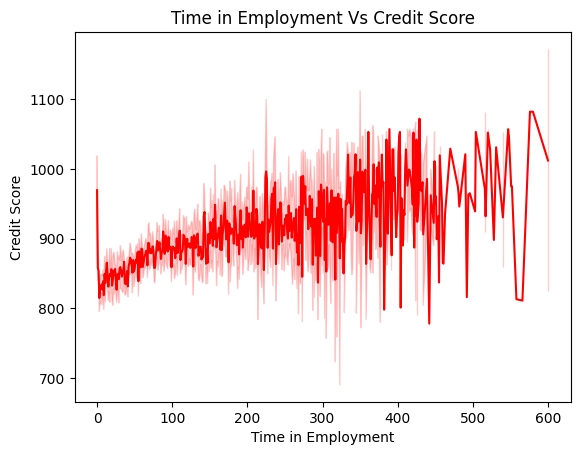

In [568]:
# Time in Employment vs. Credit Score

plt.title('Time in Employment Vs Credit Score')
plt.xlabel('Time in Employment')
plt.ylabel('Credit Score')
sns.lineplot(x='Time_in_Employment', y='Credit_Score', data=df, color='r')
plt.show()

Time in employment positively impact the credit score with a few.outliers

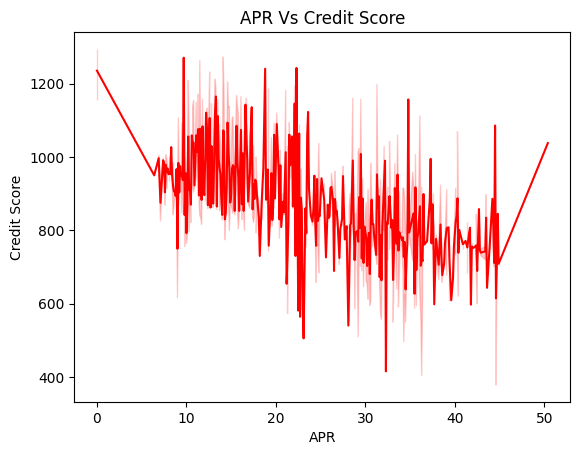

In [569]:
# APR vs. Credit Score

plt.title('APR Vs Credit Score')
plt.xlabel('APR')
plt.ylabel('Credit Score')
sns.lineplot(x='APR', y='Credit_Score', data=df, color='r')
plt.show()

Naturally, the credit score and APR are inversely proportional with few outliers. Higher the credit score, lower the APR and vice versa.

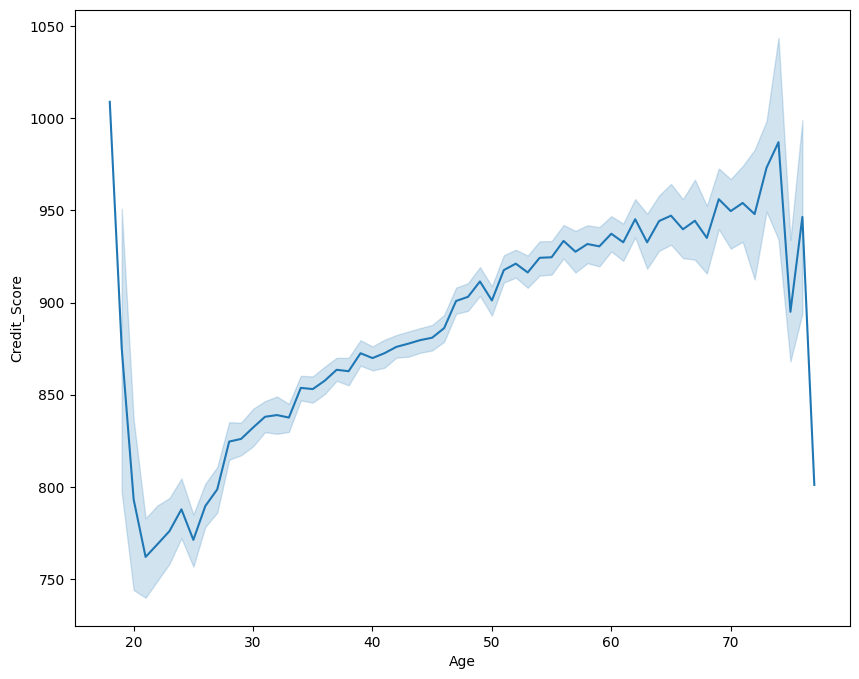

In [570]:
# Age vs. Credit Score
plt.figure(figsize=(10,8))
sns.lineplot(x=abs(df["Age"]),y=df["Credit_Score"])
plt.show()

Age and Credit Score are directly proportional with few exceptions.

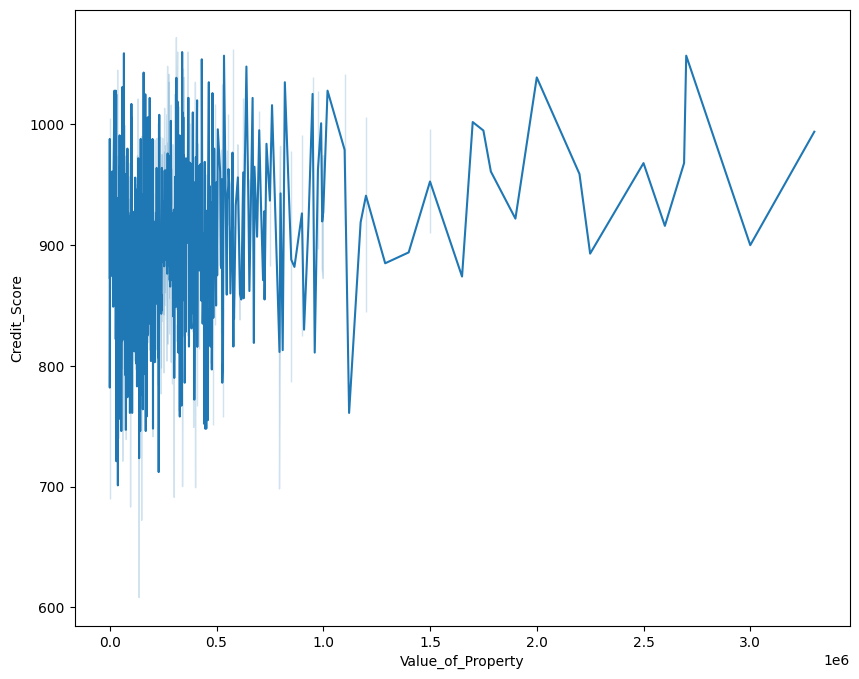

In [571]:
# Value_of_Property vs. Credit Score
plt.figure(figsize=(10,8))
sns.lineplot(x=abs(df["Value_of_Property"]),y=df["Credit_Score"])
plt.show()

The Credit Score and Value of Property do not indicate any relationship in the give sample customer base.

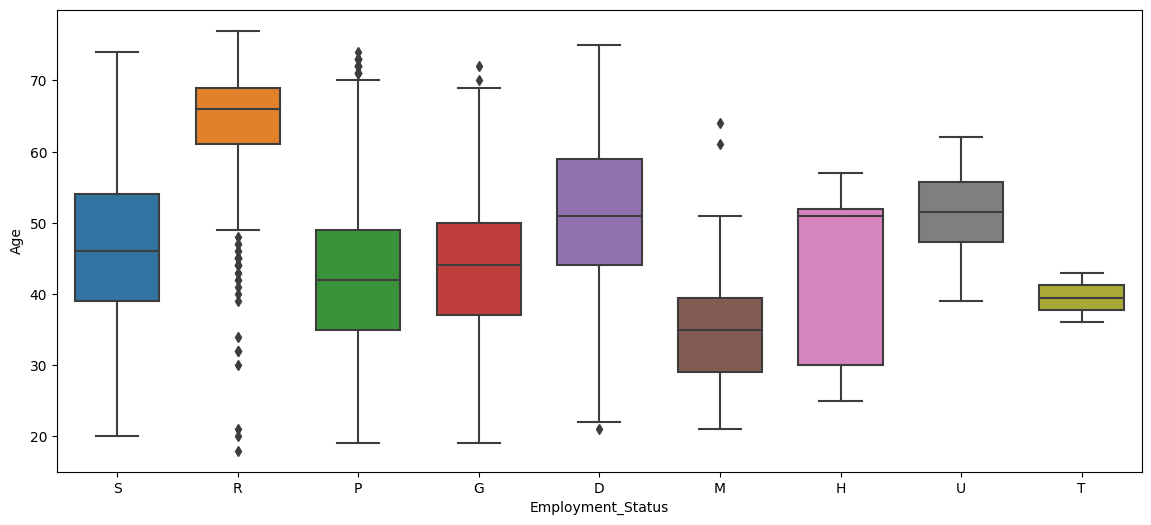

In [572]:
# Employment_Status vs. Age
plt.figure(figsize = (14,6))
sns.boxplot(x= df['Employment_Status'] , y= abs(df['Age']) ,width=.7)
plt.show()

In [573]:
round(len(df.loc[(df['Employment_Status'] == 'R') & (df['Age'] < 51)]) * 100/ len(df.loc[(df['Employment_Status'] == 'R')]))

6

Assumption: R: Retirement

An intersting observation from the sample where 6% of the customers with status = R, opting for an early retirment before reaching an age of 50, whereas the median age for retirment is 66.

#####multi-variate

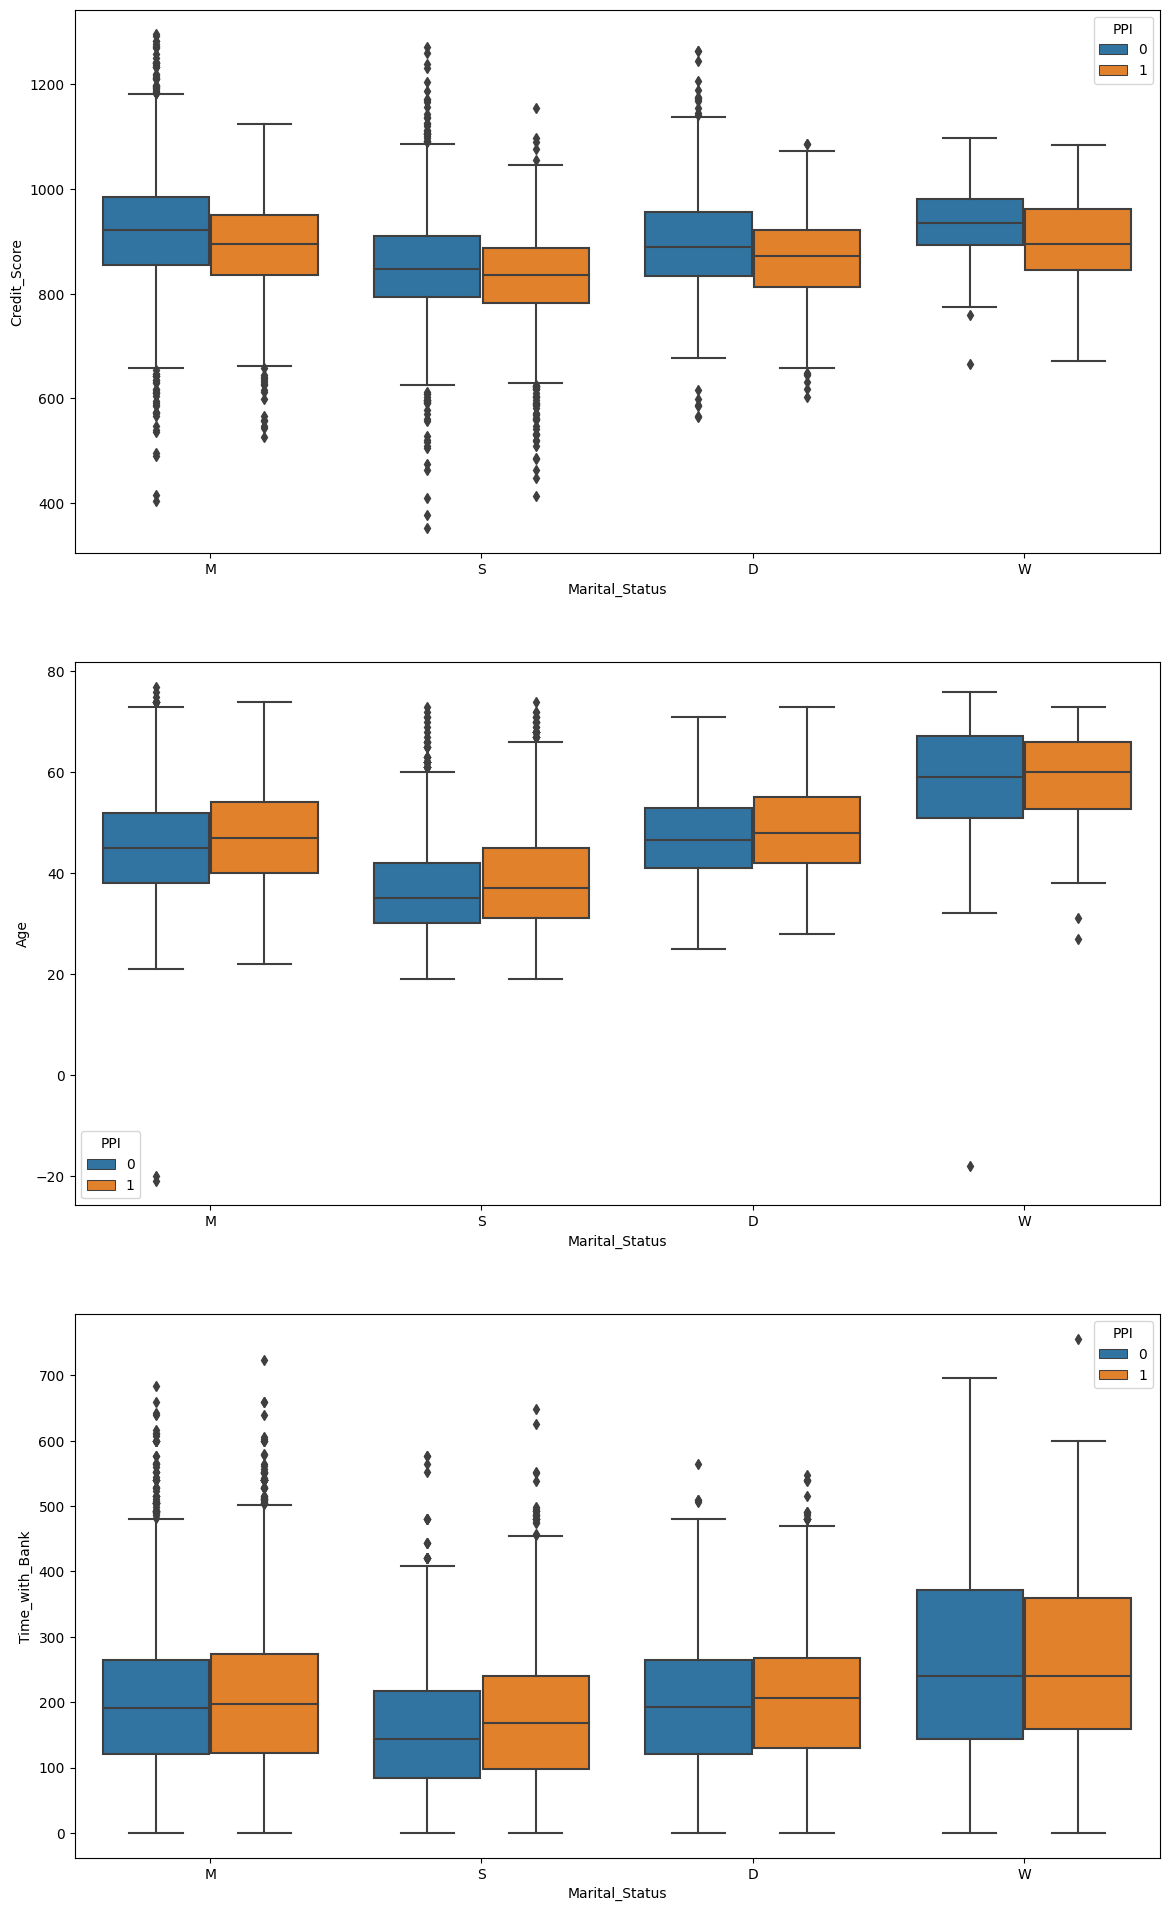

In [574]:
#Plotting subplots based on Marital Status
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Marital_Status'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Marital_Status'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Marital_Status'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

Across all the marital statuses, customers who purchased a PPI product has a slightly

1. Lower median credit score
2. Higher median age
3. Higher median time with the bank

in comparison to those who didn't purchase a PPI.

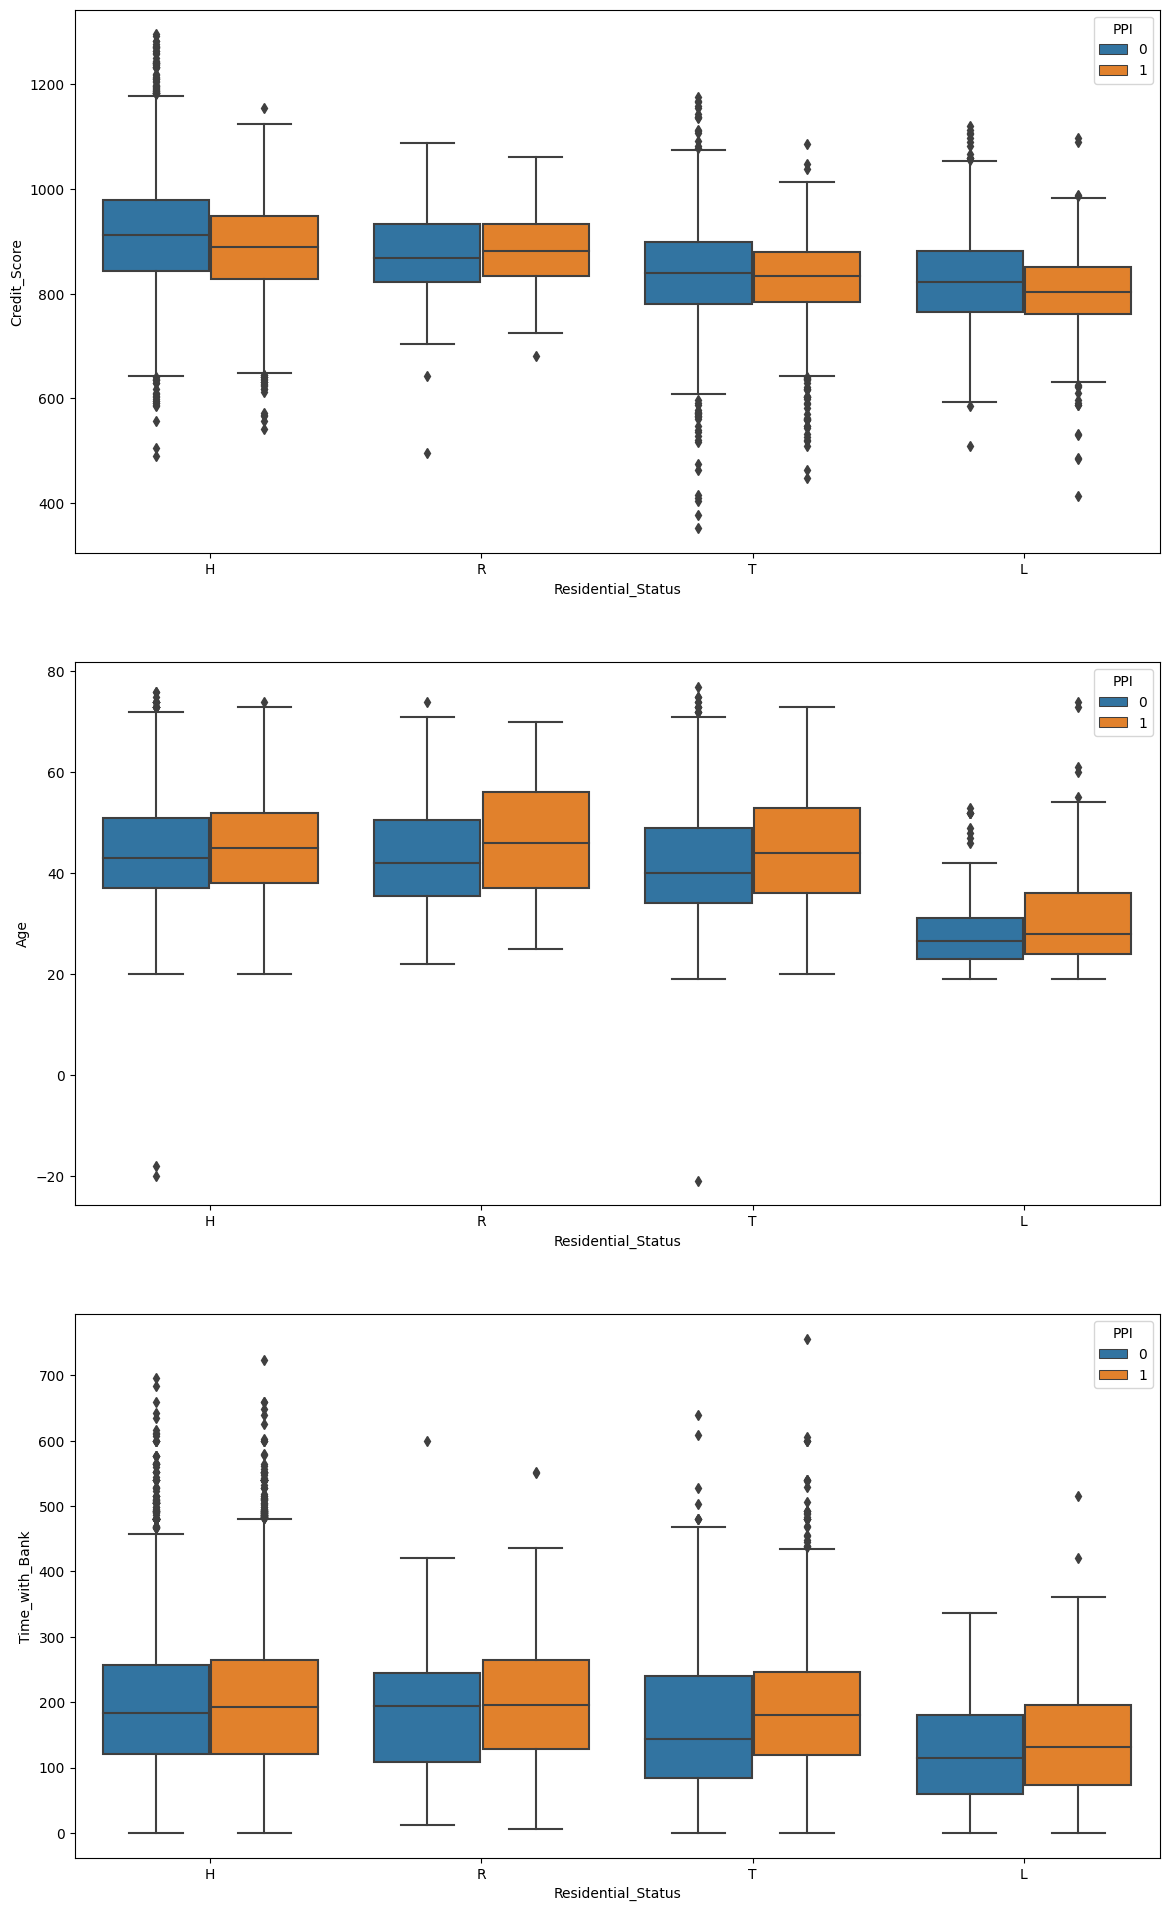

In [575]:
#Plotting subplots based on Residential_Status
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Residential_Status'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Residential_Status'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Residential_Status'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

Customers with Residential Status as
1. Homeowners and lower median credit score
2. Tenants and higher median age
3. Tenants with a higher median Time with Bank

have a higher chance to buy the PPI product compared to other residential statuses.

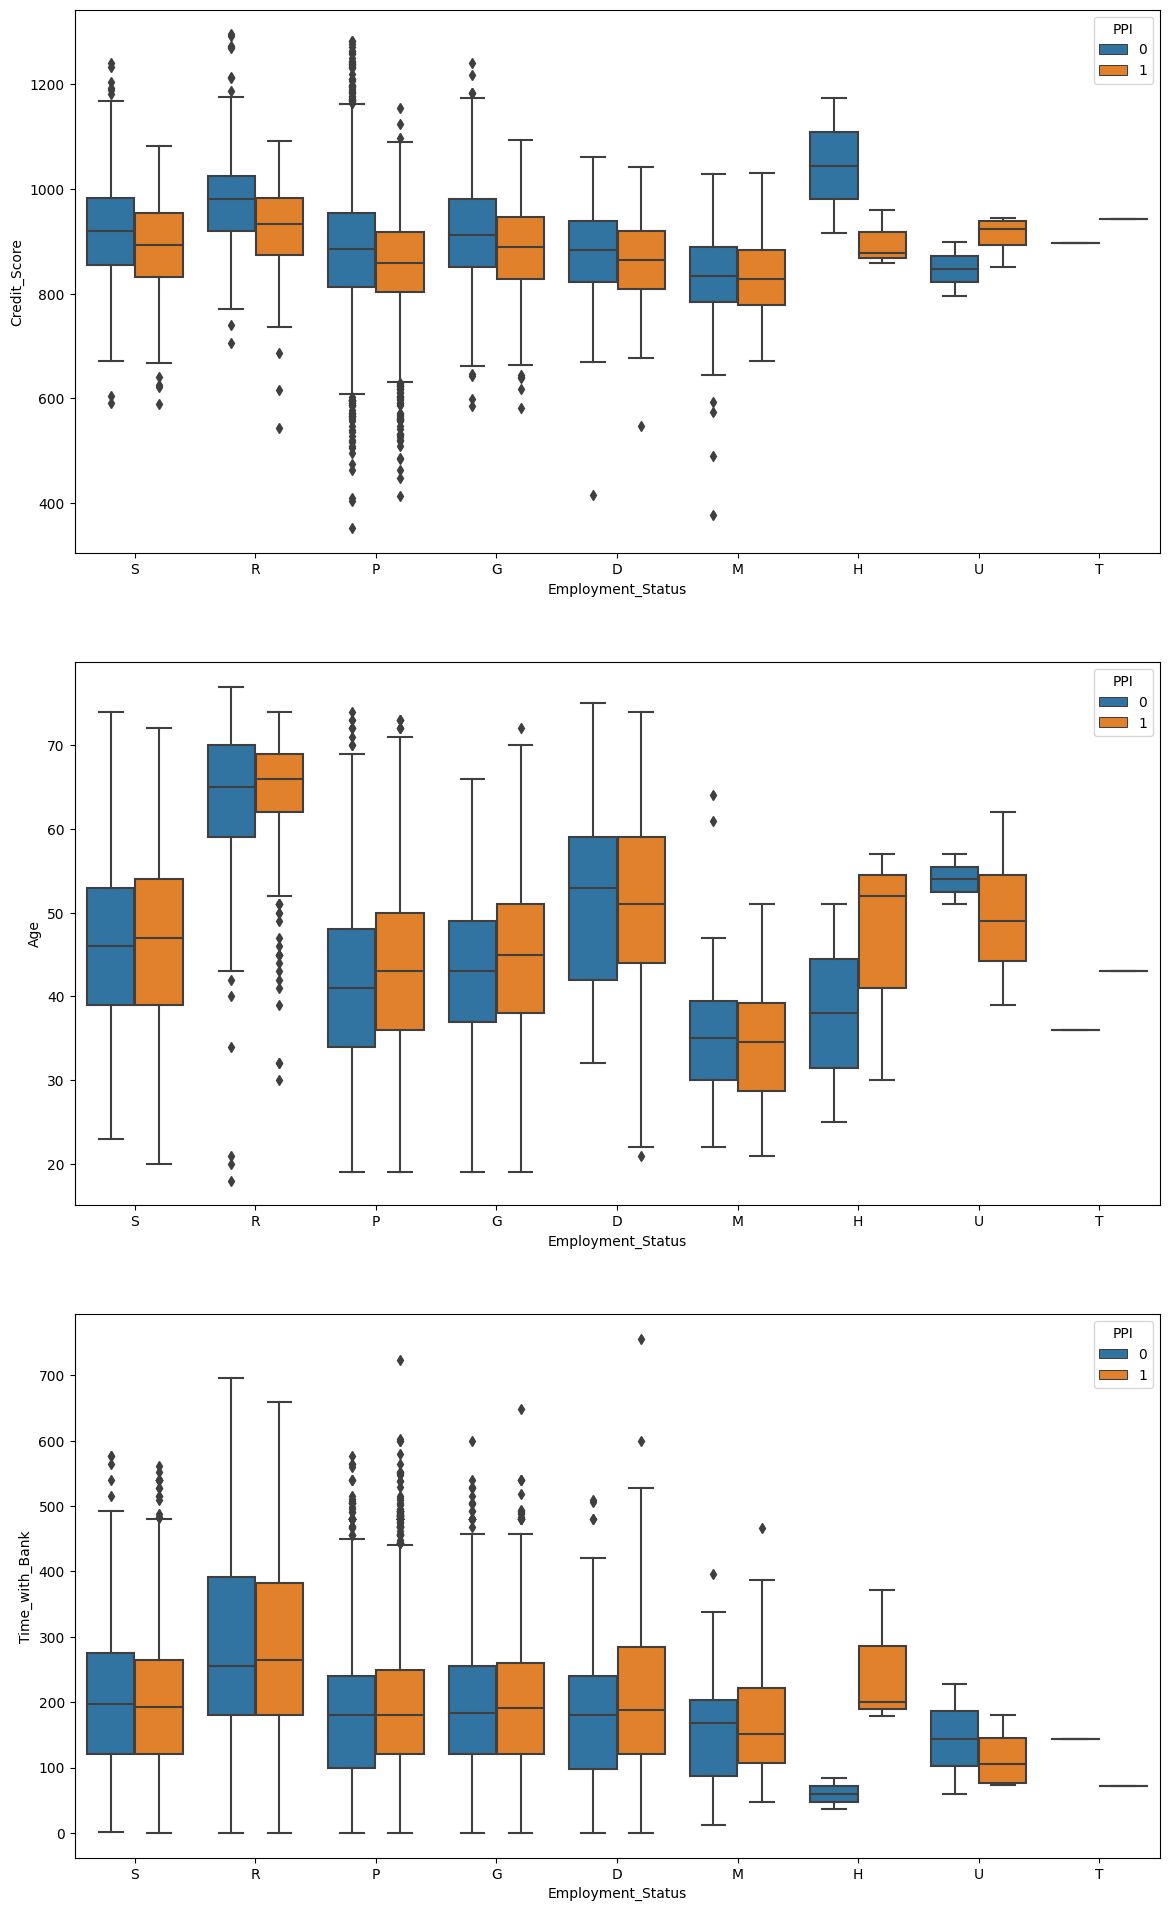

In [576]:
#Plotting subplots based on Employment_Status
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Employment_Status'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Employment_Status'], y=abs(df["Age"]), hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Employment_Status'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

Assumption: P - Part-time, U - Unemployed, D - Disabled

Customers with employment status,

1. Part-time and Lower credit score have bought PPI and higher credit score didn't buy a PPI.
2. Unemployed and with only high credit score purchased PPI.
3. Across all employee statuses, custoemrs who purhcased a PPI have a higher median Age except the ones with Unemployed and Disabled statuses.  

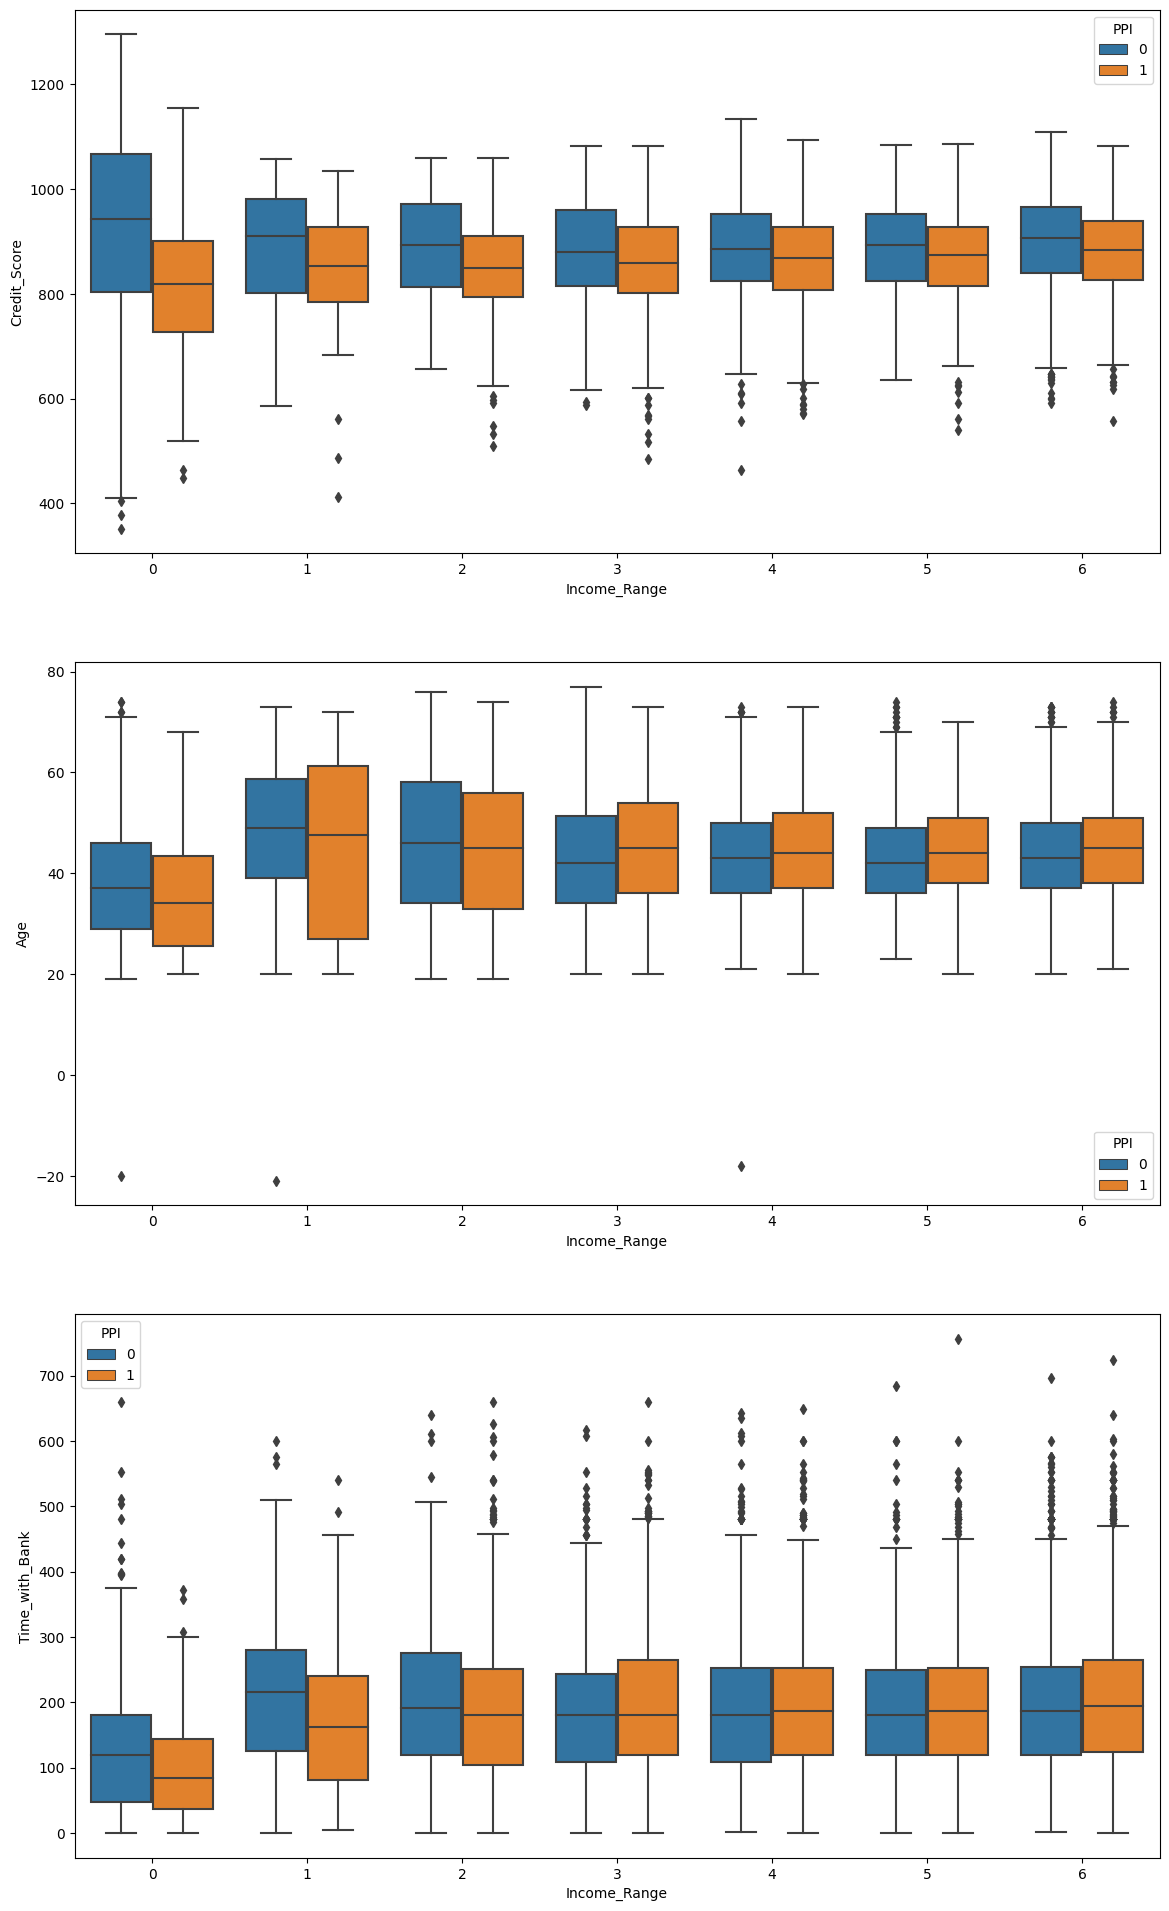

In [577]:
#Plotting subplots based on Income_Range
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['Income_Range'] , y= df['Credit_Score'] ,hue= df["PPI"])
plt.subplot(3,1,2)
sns.boxplot(x=df['Income_Range'], y=df["Age"], hue=df["PPI"])
plt.subplot(3,1,3)
sns.boxplot(x=df['Income_Range'],y=df["Time_with_Bank"] , hue=df["PPI"])
plt.show()

For the income groups,

1. 0,1,2 - customers with significantly less median credit score pruchased a PPI product.
2. 3,5,6 - customers with higher median age purchased a PPI product
3. 0,1,2 - customers with resonably lower median time with bank pruchased a PPI product

In [578]:
df['Age'] = abs(df['Age'])

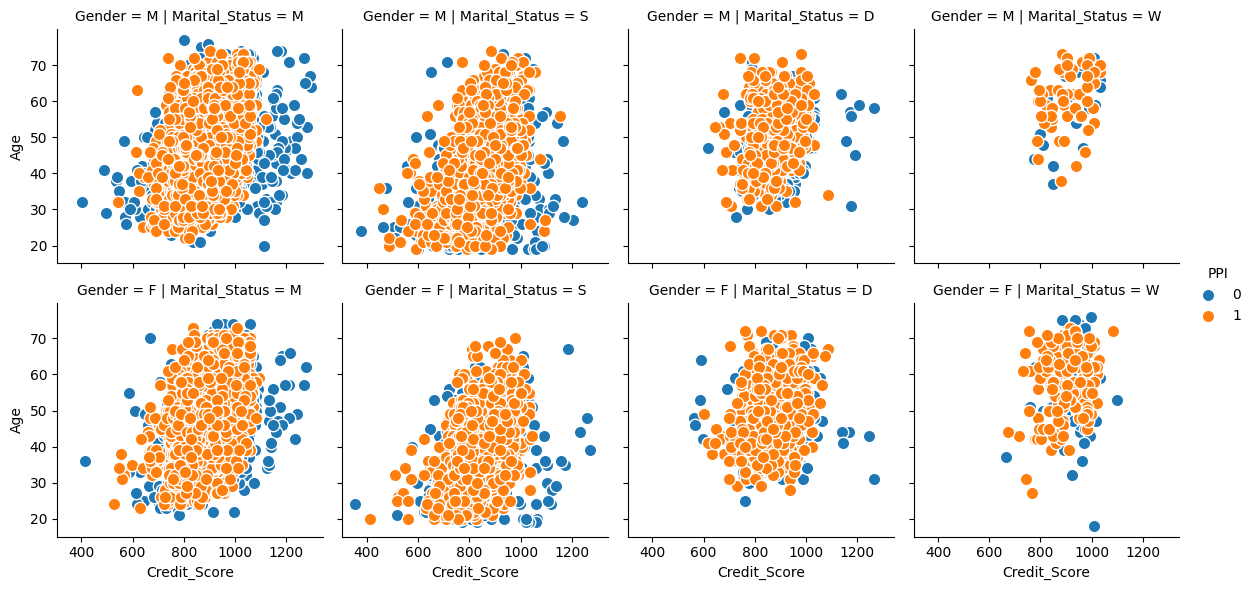

In [579]:
# Credit Score vs. Age vs. Gender vs. Marital against PPI
kws = dict(s=80, linewidth=1, edgecolor="w")
kws1 = dict(height=3, aspect=1)
g = sns.FacetGrid(df, col="Marital_Status" , row = "Gender" , hue="PPI" , **kws1)
g = g.map(plt.scatter, "Credit_Score" , "Age",**kws)
g.add_legend()
plt.show()

Irrespective of the Gender,
1. Customers with Marital Status = M or S and Credit Scores between 600 to 1000 tend to buy the PPI product
2. Customers with Marital Status = D and Credit Scores between 750 to 1000 tend to buy the PPI product
3. Customers with Marital Status = W and Credit Scores between 800 to 1000 tend to buy the PPI product

with a very few outliers

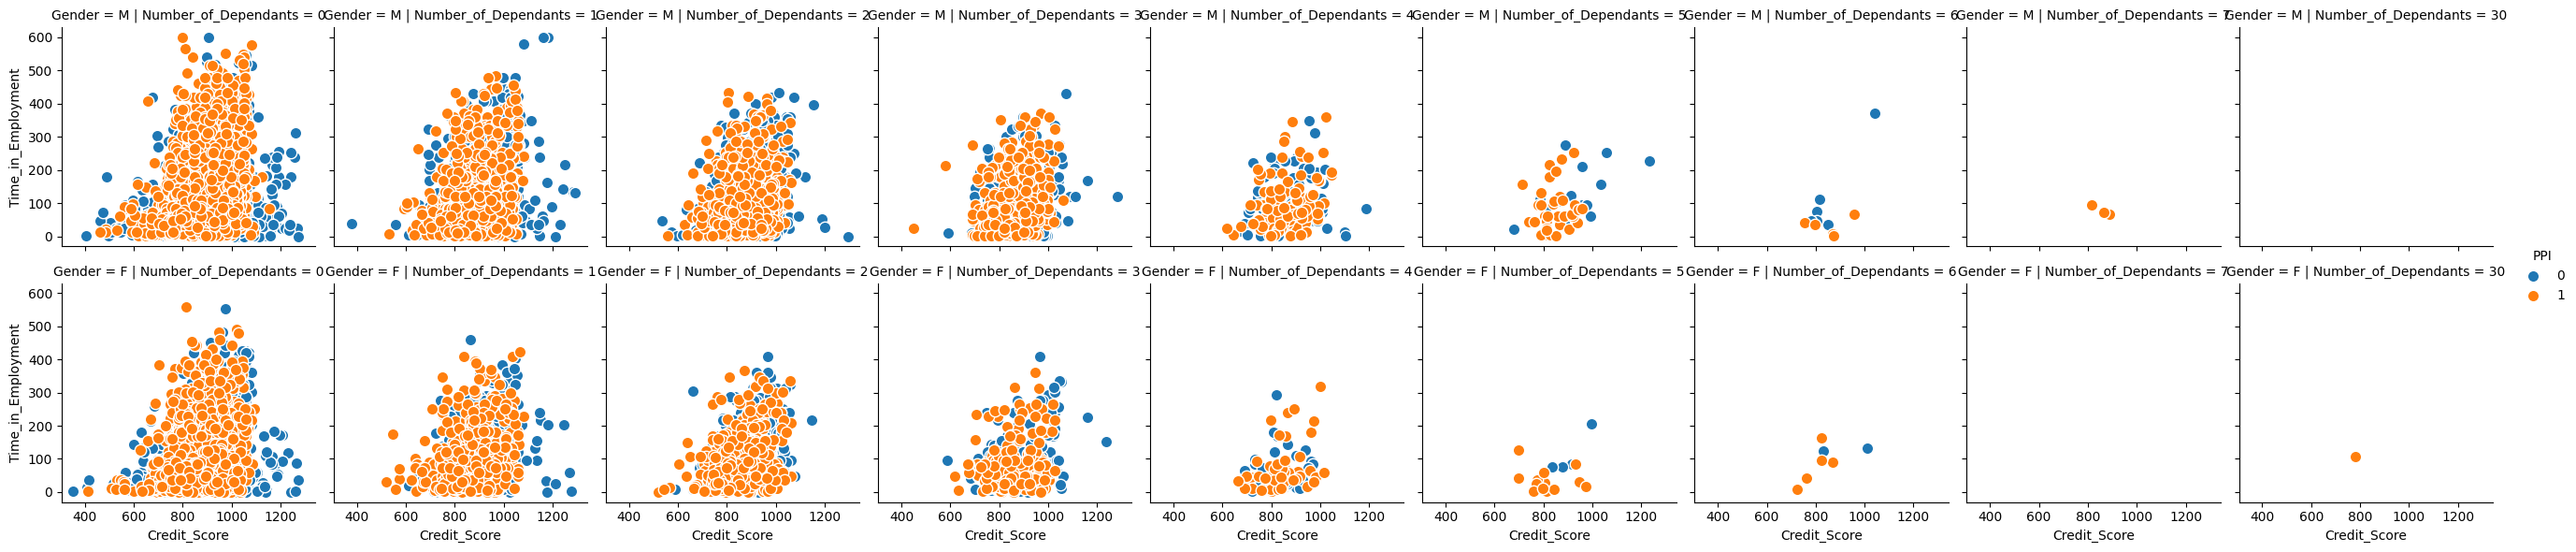

In [580]:
# Credit Score vs. Time_in_Employment vs. Gender vs. Number_of_Dependents against PPI
kws = dict(s=80, linewidth=1, edgecolor="w")
kws1 = dict(height=3, aspect=1)
g = sns.FacetGrid(df, col="Number_of_Dependants" , row = "Gender" , hue="PPI" , **kws1)
g = g.map(plt.scatter, "Credit_Score" , "Time_in_Employment",**kws)
g.add_legend()
plt.show()

1. Females with Number of Dependents greater than 3 and Credit Score greater than 650, have a very high chance of buying a PPI product though the Time in Employment is lower than Males.
2. Males customers with Dependents more than 2 and Credit Score greater than 1000 are not an ideal base for targetting the PPI product.

#####Insights

**Uni-variate**
1. ~58% customers already have a personal protection insurance and the data is almost balanced
2. The credit score almost forms a normal distribution with a slight left-skewness, where majority of the customers fall under a score of 850-900
3. Atleast 75% of the total customers opted for a loan term of 40-60 months or 3.5-5 years. 10 years loan term is the second popular term among 12.5% of the customers.
4. Only 20% or less number of total customers stayed at their address for more than 15 years, suggesting the consumers newly moved to the addresses provided or they move places frequently.
5. More than 60% of the customers have less than ~8 years of employment which suggests that the sample is skewed towards younger consumers.
6. More than 75% of the customers have their property value under 250,000 which indicates the sample is targetting towards working-class.
7. For the given sample, Age is very normally distributed, where the avg is about 44.
8. Assumptions:
    *   Final_Grade could be an evaluation of a customer's credit application and 'X' could be missing/unknown or not generated.
    *   O/R/S could be special cases/categories.
    *   A indicates excellent grade and F indices poor grade.

  Based on the above assumptions, the sample includes majority of the customers falling into good-decent final_grade bucket.

9. ~80% of the total loans are unsecured, suggesting that the sample base has Credit cards, Personal, Student types of loans.
10. Assumption: H: Homeowner; T: Tenant; L: Living with family; R: missing/unknown. 77% of the total customers have thier own property
11. Majority of the customers have either 2 or less/no dependents.
12. The sample provided includes 58% of married customers followed by 31% single.
13. The customer base sample is inclided towards male and married users.
14. Close to 100% of the customers prefer the Direct Debit method to deduct payments towards the bank/financial institution.
15. Bankruptcy has been detected for 0.15% of the total customer base.
16. CIFAS indicated, the fraud is detected on the 1% of the sample customer base.

**Bi-variate**
1. There is a little effect of Time_at_address on the Credit_Score.
2. Naturally, the credit score and APR are inversely proportional with few outliers. Higher the credit score, lower the APR and vice versa.
3. Time in employment positively impact the credit score with a few outliers.
4. Age and Credit Score are directly proportional with few exceptions.
5. The Credit Score and Value of Property do not indicate any relationship in the give sample customer base.
6. Assumption: R: Retirement; An intersting observation from the sample where 6% of the customers with status = R, opting for an early retirment before reaching an age of 50, whereas the median age for retirment is 66.


**Multi-variate**
1. Across all the marital statuses, customers who purchased a PPI product has a slightly
    *   Lower median credit score
    *   Higher median age
    *   Higher median time with the bank

  in comparison to those who didn't purchase a PPI.

2. Customers with Residential Status as
    *   Homeowners and lower median credit score
    *   Tenants and higher median age
    *   Tenants with a higher median Time with Bank
  
  have a higher chance to buy the PPI product compared to other residential statuses.

3. Customers with employment status,

  Assumption: P - Part-time, U - Unemployed, D - Disabled
    *   Part-time and Lower credit score have bought PPI and higher credit score didn't buy a PPI.
    *   Unemployed and with only high credit score purchased PPI.
    *   Across all employee statuses, custoemrs who purhcased a PPI have a higher median Age except the ones with Unemployed and Disabled statuses.

4. For the income groups,

    * 0,1,2 - customers with significantly less median credit score pruchased a PPI product.
    * 3,5,6 - customers with higher median age purchased a PPI product
    * 0,1,2 - customers with resonably lower median time with bank pruchased a PPI product

5. Irrespective of the Gender,

    * Customers with Marital Status = M or S and Credit Scores between 600 to 1000 tend to buy the PPI product
    * Customers with Marital Status = D and Credit Scores between 750 to 1000 tend to buy the PPI product
    * Customers with Marital Status = W and Credit Scores between 800 to 1000 tend to buy the PPI product
with a very few outliers

6. Females with Number of Dependents greater than 3 and Credit Score greater than 650, have a very high chance of buying a PPI product though the Time in Employment is lower than Males.

7. Males customers with Dependents more than 2 and Credit Score greater than 1000 are not an ideal base for targetting the PPI product.








####Hypothesis Testing

In [581]:
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [582]:
# Finding Categorical columns in the dataframe
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Final_Grade', 'Loan_Type', 'Residential_Status', 'Telephone_Indicator',
       'Marital_Status', 'Gender', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Current_Account',
       'ACCESS_Card', 'VISA_Card', 'American_Express', 'Diners_Card',
       'Cheque_Guarantee', 'Other_Credit_Store_Card', 'Payment_Method',
       'Bankruptcy_Detected__SP_', 'CIFAS_detected', 'Insurance_Description',
       'prdt_desc', 'category'],
      dtype='object')

In [583]:
# Converting the bottom 5% of the values/categories to others on high cardinality columns

for column in cat_cols:
    # Calculate the distribution of each category
    category_distribution = df[column].value_counts(normalize=True)

    # Identify categories with less than 5% distribution
    small_categories = category_distribution[category_distribution < 0.05].index

    # Replace small categories with 'others'
    df.loc[df[column].isin(small_categories), column] = 'others'

In [584]:
# Checking the percentage distribution of categorical columns to address the cardinality:
for i in cat_cols:
  if (df[i].dtype == 'object'):
    print(round(df[i].value_counts(normalize=True)*100, 1).head(10).to_frame())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

        Final_Grade
A              27.7
X              24.9
B              13.7
C               9.4
others          9.3
D               8.3
E               6.7
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
           Loan_Type
UnSecured       79.7
secured         20.3
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        Residential_Status
H                     76.7
T                     17.6
others                 5.7
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
   Telephone_Indicator
Y                 93.0
N                  7.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        Marital_Status
M                 57.6
S                 30.7
D                  9.8
others             1.9
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
   Gender
M    59.6
F    40.4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        Employment_Status
P  

In [585]:
# Deleting rows where PPI = 0 and either bankrupcy/CIFAS is detected
df.drop(df.loc[((df['CIFAS_detected'] != 'N') | (df['Bankruptcy_Detected__SP_'] != 'N')) & (df['PPI'] == 0)].index, inplace = True)

In [586]:
df['Insurance_Description'] = df['Insurance_Description'].str.strip()
df['Insurance_Description'] = df['Insurance_Description'].replace('Other' ,'others')
df['Insurance_Description'].value_counts()

LASU                    2351
Single                  1849
others                  1735
LIFE & CRITICAL ILLN    1025
Joint                    989
Life & CI                795
LASCI                    717
Name: Insurance_Description, dtype: int64

In [587]:
# Hypothesis Test - 1

# Ho : Credit Score has no effect on PPI(1/0)
# Ha : Credit Score has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Credit_Score']
ppi_0 = df[df['PPI']==0]['Credit_Score']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  -17.88
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [588]:
# Hypothesis Test - 2

# Ho : Value of Property has no effect on PPI(1/0)
# Ha : Value of Property has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Value_of_Property']
ppi_0 = df[df['PPI']==0]['Value_of_Property']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  -19.0
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [589]:
# Hypothesis Test - 3

# Ho : Age has no effect on PPI(1/0)
# Ha : Age has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Age']
ppi_0 = df[df['PPI']==0]['Age']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  9.14
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [590]:
# Hypothesis Test - 4

# Ho : Term has no effect on PPI(1/0)
# Ha : Term has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Term']
ppi_0 = df[df['PPI']==0]['Term']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  14.66
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [591]:
# Hypothesis Test - 5

# Ho : Time_at_Address has no effect on PPI(1/0)
# Ha : Time_at_Address has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Time_at_Address']
ppi_0 = df[df['PPI']==0]['Time_at_Address']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  11.87
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [592]:
# Hypothesis Test - 6

# Ho : Time_in_Employment has no effect on PPI(1/0)
# Ha : Time_in_Employment has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Time_in_Employment']
ppi_0 = df[df['PPI']==0]['Time_in_Employment']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  -2.48
p-value:  0.01
Since p_value < alpha we reject the null hypothesis.


In [593]:
# Hypothesis Test - 7

# Ho : Time_with_Bank has no effect on PPI(1/0)
# Ha : Time_with_Bank has an effect on purhcasing a PPI product

# Significance level: alpha = 0.05

alpha = 0.05
# test statistic: t-test - ttest_ind
from scipy.stats import ttest_ind # When we have 2 sample datasets
ppi_1 = df[df['PPI']==1]['Time_with_Bank']
ppi_0 = df[df['PPI']==0]['Time_with_Bank']
ttest_result = ttest_ind(ppi_1, ppi_0, alternative='two-sided')
test_statistic = ttest_result[0]
p_value = ttest_result[1]
print("test statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')

test statistic:  4.8
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [594]:
# Hypothesis Test - 8

# Ho : The variables are independent of each other
# Ha : The variables are depenent

contingency = pd.crosstab(df['Income_Range'], df['Insurance_Description'])

# Significance level: alpha = 0.05
alpha = 0.05

# test statistic: chi2 test of independence
from scipy.stats import chi2_contingency # For performing chi2 test of independence
chi2_result = chi2_contingency(contingency)

test_statistic = chi2_result[0]
p_value = chi2_result[1]
print("\ntest statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')



test statistic:  1033.04
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [595]:
# Hypothesis Test - 9

# Ho : The variables are independent of each other
# Ha : The variables are depenent

contingency = pd.crosstab(df['Gender'], df['Insurance_Description'])

# Significance level: alpha = 0.05
alpha = 0.05

# test statistic: chi2 test of independence
from scipy.stats import chi2_contingency # For performing chi2 test of independence
chi2_result = chi2_contingency(contingency)

test_statistic = chi2_result[0]
p_value = chi2_result[1]
print("\ntest statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')



test statistic:  61.22
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


In [596]:
# Hypothesis Test - 10

# Ho : The variables are independent of each other
# Ha : The variables are depenent

contingency = pd.crosstab(df['Marital_Status'], df['Insurance_Description'])

# Significance level: alpha = 0.05
alpha = 0.05

# test statistic: chi2 test of independence
from scipy.stats import chi2_contingency # For performing chi2 test of independence
chi2_result = chi2_contingency(contingency)

test_statistic = chi2_result[0]
p_value = chi2_result[1]
print("\ntest statistic: ", round(test_statistic,2))
print("p-value: ", round(p_value,2))

# Decision to accept or reject null hypothesis
if p_value > alpha:
  print('Since p_value > alpha we fail to reject the null hypothesis.')
else:
  print('Since p_value < alpha we reject the null hypothesis.')



test statistic:  768.85
p-value:  0.0
Since p_value < alpha we reject the null hypothesis.


#####Insights

t-tests:

1. Credit Score has an impact on PPI purchase with a test statistic:  -17.88, which indicates it lies to the left of the mean and a reversal in the directionality of the effect.
2. Value of Property has an impact on PPI purchase with a test statistic:  -19.00, which indicates it lies to the left of the mean and a reversal in the directionality of the effect.
3. Age has an impact on PPI purchase with a test statistic:  9.14, which indicates it lies to the right of the mean and forward in the directionality of the effect.
4. Term has an impact on PPI purchase with a test statistic:  14.66, which indicates it lies to the right of the mean and forward in the directionality of the effect.
5. Time_at_Address has an impact on PPI purchase with a test statistic:  11.87, which indicates it lies to the right of the mean and forward in the directionality of the effect.
6. Time_in_Employment has a slight impact on PPI purchase with a test statistic:  -2.48, which indicates it lies to the left of the mean and a reversal in the directionality of the effect.
7. Time_with_Bank has an impact on PPI purchase with a test statistic:  4.87, which indicates it lies to the right of the mean and forward in the directionality of the effect.

chi-square:

1. Income_Range and Insurance_Description are significantly dependent on each other with a test statistic:  1033.04
2. Gender and Insurance_Description are moderately dependent on each other with a test statistic:  61.22
3. Marital_Status and Insurance_Description are significantly dependent on each other with a test statistic:  768.85

In [597]:
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,others,others,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,others,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,others,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,others,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,others,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


###Model Building

1. Feature Selection
2. Model Training
3. Model Validation
4. Model Evaluation

In [598]:
!pip install heatmapz

<ipython-input-599-4699a29fded6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot(df.corr())


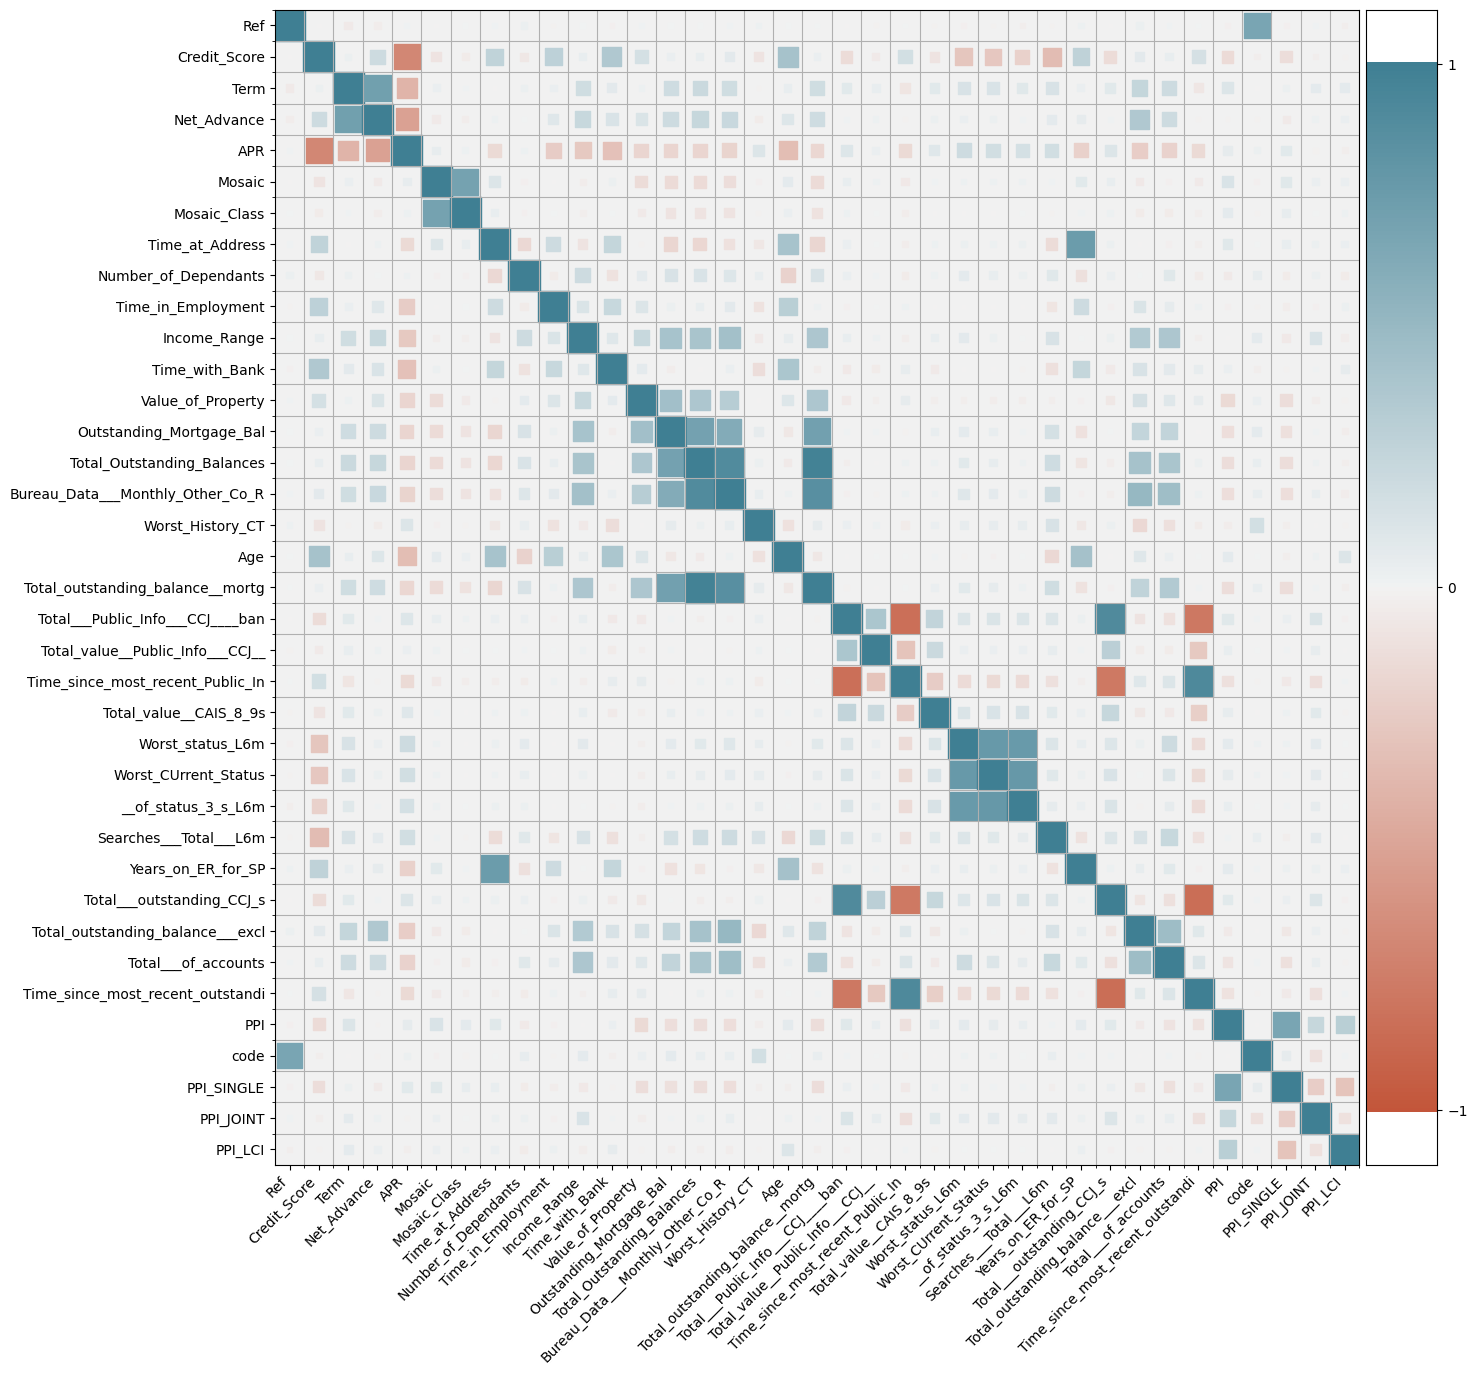

In [599]:
import matplotlib.pyplot as plt
from heatmap import corrplot

plt.figure(figsize=(15, 15))
corrplot(df.corr())

In [600]:
df.columns

Index(['Ref', 'Credit_Score', 'Final_Grade', 'Term', 'Net_Advance', 'APR',
       'Loan_Type', 'Mosaic', 'Mosaic_Class', 'Time_at_Address',
       'Residential_Status', 'Telephone_Indicator', 'Number_of_Dependants',
       'Marital_Status', 'Gender', 'Time_in_Employment', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Income_Range',
       'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express',
       'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card',
       'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal',
       'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R',
       'Worst_History_CT', 'Payment_Method', 'Age',
       'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban',
       'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In',
       'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status',
       '__of_status_3_s_L6m', 'Searches___Total___L6m', '

In [601]:
# dnsuring there are no trailing/leading spaces in the column names
df.columns = df.columns.str.strip()
df['code'] = df['code'].fillna(-1)

In [602]:
# dropping columns based on the correlation/repatetive nature with other columns
select_cols = ['PPI', 'Value_of_Property', 'Age', 'Term', 'Insurance_Description', 'Marital_Status', 'code', 'Final_Grade', 'Time_at_Address', 'Mosaic', 'Total_value__CAIS_8_9s', 'Total_outstanding_balance__mortg', 'Income_Range', 'Total___of_accounts', 'Total_value__Public_Info___CCJ__', 'PPI_LCI', 'Credit_Score', 'Residential_Status']

In [603]:
# dropping the columns
df =df[select_cols]

In [604]:
df.describe(include='all')

,PPI,Value_of_Property,Age,Term,Insurance_Description,Marital_Status,code,Final_Grade,Time_at_Address,Mosaic,Total_value__CAIS_8_9s,Total_outstanding_balance__mortg,Income_Range,Total___of_accounts,Total_value__Public_Info___CCJ__,PPI_LCI,Credit_Score,Residential_Status
count,16346.000000,1.634600e+04,16346.000000,16346.000000,9461,16346,16346.000000,16346,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346
unique,NaN,NaN,NaN,NaN,7,4,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,LASU,M,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
freq,NaN,NaN,NaN,NaN,2351,9406,NaN,4528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12543
mean,0.578796,1.662486e+05,44.108100,59.148110,NaN,NaN,427.249847,NaN,120.475835,29.438089,18.455708,64.852319,4.408601,5.985623,4.699804,0.120641,882.026306,NaN
std,0.493767,1.186063e+05,10.857265,26.682423,NaN,NaN,368.371253,NaN,109.162306,16.712877,62.501273,81.788270,1.667606,2.666718,38.890910,0.325720,93.109964,NaN
min,0.000000,1.000000e+00,18.000000,6.000000,NaN,NaN,-1.000000,NaN,1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,352.000000,NaN
25%,0.000000,1.200000e+05,36.000000,48.000000,NaN,NaN,-1.000000,NaN,38.000000,16.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,818.000000,NaN
50%,1.000000,1.250000e+05,44.000000,60.000000,NaN,NaN,715.000000,NaN,84.000000,25.000000,0.000000,48.000000,5.000000,6.000000,0.000000,0.000000,882.000000,NaN
75%,1.000000,1.900000e+05,51.000000,60.000000,NaN,NaN,757.000000,NaN,180.000000,44.000000,8.000000,104.000000,6.000000,9.000000,0.000000,0.000000,947.000000,NaN


In [605]:
df.shape

(16346, 18)

In [606]:
df.columns = df.columns.str.replace("__", "_")
df.columns = df.columns.str.replace("__", "_")

In [607]:
df.columns

Index(['PPI', 'Value_of_Property', 'Age', 'Term', 'Insurance_Description',
       'Marital_Status', 'code', 'Final_Grade', 'Time_at_Address', 'Mosaic',
       'Total_value_CAIS_8_9s', 'Total_outstanding_balance_mortg',
       'Income_Range', 'Total_of_accounts', 'Total_value_Public_Info_CCJ_',
       'PPI_LCI', 'Credit_Score', 'Residential_Status'],
      dtype='object')

In [608]:
# Seperating numerical and categorical features for encoding/scaling
numerical_features = ['Value_of_Property', 'Age', 'Term', 'code', 'Mosaic', 'Credit_Score', 'Time_at_Address', 'Total_value_CAIS_8_9s', 'Total_outstanding_balance_mortg', 'Total_value_Public_Info_CCJ_']
categorical_features = df.loc[:, ~df.columns.isin(numerical_features)].columns


In [609]:
# Label encoding the categorical features
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

le=LabelEncoder()
for column in categorical_features:
  df[column] = le.fit_transform(df[column])

<ipython-input-609-f7300165f08d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-609-f7300165f08d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-609-f7300165f08d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [610]:
df.head()

,PPI,Value_of_Property,Age,Term,Insurance_Description,Marital_Status,code,Final_Grade,Time_at_Address,Mosaic,Total_value_CAIS_8_9s,Total_outstanding_balance_mortg,Income_Range,Total_of_accounts,Total_value_Public_Info_CCJ_,PPI_LCI,Credit_Score,Residential_Status
0,0,178000,46,36,7,1,-1.0,0,132,46,0,64,6,7,5,0,918,0
1,1,180000,59,120,6,2,748.0,0,288,16,0,13,2,9,0,1,903,0
2,1,199000,56,78,0,1,719.0,5,276,17,266,19,5,8,30,0,1060,0
3,1,120000,33,60,6,1,748.0,1,48,47,1,160,6,10,0,1,839,2
4,1,180000,49,60,5,1,718.0,5,156,55,0,62,6,7,0,0,1057,0


In [611]:
df.shape

(16346, 18)

In [612]:
# Split the data into train, test, and validation sets
df_train = df[df['PPI'] == 1]
df_val = df[df['PPI'] == 0]

df_train.drop('PPI', axis=1, inplace=True)
df_val.drop(['PPI', 'Insurance_Description'], axis=1, inplace=True)

<ipython-input-612-2da32cbc2bb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('PPI', axis=1, inplace=True)
<ipython-input-612-2da32cbc2bb6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(['PPI', 'Insurance_Description'], axis=1, inplace=True)


In [613]:
df_train.shape, df_val.shape

((9461, 17), (6885, 16))

In [614]:
y = df_train['Insurance_Description'].values
X = df_train.drop(['Insurance_Description'], axis=1).values

In [615]:
y = y.reshape(-1, 1)
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = y_encoded.ravel()

num_classes = len(np.unique(y_encoded))
num_classes

7

In [629]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_val = Scaler.fit_transform(df_val)

In [620]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scaled, y_encoded, random_state = 42, stratify = y)

In [621]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7095, 16), (2366, 16), (7095,), (2366,))

In [622]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 44.04
Time consumed for training: 0.003 seconds
Time consumed for prediction: 0.10559 seconds


In [623]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 64.03
Time consumed for training: 1.495 seconds
Time consumed for prediction: 0.68060 seconds


In [624]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 89.26
Time consumed for training: 0.108 seconds
Time consumed for prediction: 0.00520 seconds


In [625]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 94.08
Time consumed for training: 3.020
Time consumed for prediction: 0.01879 seconds


In [626]:
results = pd.DataFrame({
    'Model': ['KNN', 'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time,  xgb_train_time, rfc_train_time,
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,94.082840,3.019695,0.018791
Random Forest,89.264582,0.108460,0.005198
SVC,64.032122,1.494732,0.680596
KNN,44.040575,0.002515,0.105590


In [633]:
print(sklearn.metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       247
         1.0       0.91      0.99      0.95       179
         2.0       0.91      0.99      0.95       588
         3.0       0.94      0.98      0.96       256
         4.0       1.00      0.99      1.00       199
         5.0       0.99      1.00      1.00       463
         6.0       0.90      0.77      0.83       434

    accuracy                           0.94      2366
   macro avg       0.94      0.95      0.94      2366
weighted avg       0.94      0.94      0.94      2366



In [628]:
from sklearn.model_selection import cross_val_score
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.93239437 0.93098592 0.93521127 0.92676056 0.91971831 0.94358251
 0.93653032 0.93653032 0.92947814 0.92524683]
Mean: 0.9316438546653687
Standard Deviation: 0.006447377095405586
